In [4]:
import os
import numpy as np
import tensorflow as tf
dirname = os.path.dirname(os.path.abspath(__name__))
train_data = np.loadtxt(dirname + "/train.txt",unpack=True,dtype=np.float32)
print(train_data)

[[ 1.  1.  1.  1.  1.  1.]
 [ 2.  3.  3.  5.  7.  2.]
 [ 1.  2.  4.  5.  5.  5.]
 [ 0.  0.  0.  1.  1.  1.]]


In [18]:
x_data = train_data[0:-1]
y_data = train_data[-1]
sess = tf.Session()

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_uniform([1,len(x_data)],-5.0,5.0))
h = tf.matmul(W,X)
hypothesis = tf.div(1.,tf.add(1.0,tf.exp(-h)))
cost = tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
a = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(a)
train_step = optimizer.minimize(cost)

init = tf.global_variables_initializer()
sess.run(init)

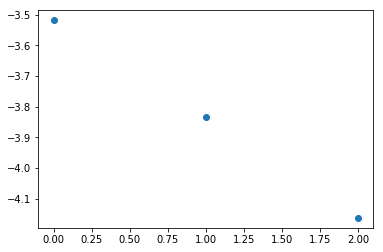

In [19]:
loss_vec = []
for i in range(2001):
    sess.run(train_step,feed_dict={X: x_data,Y: y_data})
    temp_cost = sess.run(cost,feed_dict={X: x_data,Y: y_data})
    loss_vec.append(temp_cost)
    
import matplotlib.pyplot as plt

plt.plot(loss_vec,"o",label="Data")
